
Output variable -> y
y -> Whether the client has subscribed a term deposit or not
Binomial ("yes" or "no")


In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [63]:
from google.colab import files
uploaded=files.upload()

Saving bank-full (1) (1).csv to bank-full (1) (1) (2).csv


In [64]:
data=pd.read_csv('bank-full (1) (1).csv')

In [65]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [67]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [68]:
data.corr()

<ipython-input-68-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [69]:
data.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [70]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [71]:
data=pd.get_dummies(data,columns={'job','marital','education','default','housing','loan','contact','month','poutcome','y'})

<ipython-input-71-fd4efadba40e>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data=pd.get_dummies(data,columns={'job','marital','education','default','housing','loan','contact','month','poutcome','y'})


In [72]:
data.head(3)

,age,balance,day,duration,campaign,pdays,previous,y_no,y_yes,month_apr,...,education_secondary,education_tertiary,education_unknown,marital_divorced,marital_married,marital_single,housing_no,housing_yes,loan_no,loan_yes
0,58,2143,5,261,1,-1,0,1,0,0,...,0,1,0,0,1,0,0,1,1,0
1,44,29,5,151,1,-1,0,1,0,0,...,1,0,0,0,0,1,0,1,1,0
2,33,2,5,76,1,-1,0,1,0,0,...,1,0,0,0,1,0,0,1,0,1


In [73]:
data.isnull().sum()

age                    0
balance                0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
y_no                   0
y_yes                  0
month_apr              0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
poutcome_failure       0
poutcome_other         0
poutcome_success       0
poutcome_unknown       0
contact_cellular       0
contact_telephone      0
contact_unknown        0
default_no             0
default_yes            0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 53 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   y_no                 45211 non-null  uint8
 8   y_yes                45211 non-null  uint8
 9   month_apr            45211 non-null  uint8
 10  month_aug            45211 non-null  uint8
 11  month_dec            45211 non-null  uint8
 12  month_feb            45211 non-null  uint8
 13  month_jan            45211 non-null  uint8
 14  month_jul            45211 non-null  uint8
 15  month_jun            45211 non-null  uint8
 16  month_mar            4

In [75]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous,y_no,y_yes,month_apr,...,education_secondary,education_tertiary,education_unknown,marital_divorced,marital_married,marital_single,housing_no,housing_yes,loan_no,loan_yes
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,-0.025155,0.025155,-0.028902,...,-0.093979,-0.081629,0.069665,0.164674,0.286257,-0.427817,0.185513,-0.185513,0.015655,-0.015655
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,-0.052838,0.052838,0.015593,...,-0.069937,0.084001,0.011181,-0.021732,0.025708,-0.012537,0.068768,-0.068768,0.084350,-0.084350
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,0.028348,-0.028348,0.047805,...,-0.005831,0.021730,0.000114,-0.000433,0.007102,-0.007412,0.027982,-0.027982,-0.011370,0.011370
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,-0.394521,0.394521,0.040838,...,0.002084,0.000891,-0.000682,0.006100,-0.022683,0.020328,-0.005075,0.005075,0.012412,-0.012412
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,0.073172,-0.073172,-0.068728,...,-0.020893,0.012866,0.005704,-0.015484,0.031371,-0.023120,0.023599,-0.023599,-0.009980,0.009980
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,-0.103621,0.103621,0.144664,...,0.022105,-0.007568,-0.006907,0.002897,-0.027600,0.027943,-0.124178,0.124178,0.022754,-0.022754
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,-0.093236,0.093236,0.053985,...,-0.005603,0.022888,-0.008257,-0.004534,-0.012691,0.017006,-0.037076,0.037076,0.011043,-0.011043
y_no,-0.025155,-0.052838,0.028348,-0.394521,0.073172,-0.103621,-0.093236,1.000000,-1.000000,-0.065392,...,0.036388,-0.066448,-0.012053,-0.002772,0.060260,-0.063526,-0.139173,0.139173,-0.068185,0.068185
y_yes,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,-1.000000,1.000000,0.065392,...,-0.036388,0.066448,0.012053,0.002772,-0.060260,0.063526,0.139173,-0.139173,0.068185,-0.068185
month_apr,-0.028902,0.015593,0.047805,0.040838,-0.068728,0.144664,0.053985,-0.065392,0.065392,1.000000,...,0.011557,-0.007015,-0.004720,-0.019043,-0.003829,0.017658,-0.079406,0.079406,0.027371,-0.027371


In [76]:
data.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y_no', 'y_yes', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown',
       'contact_cellular', 'contact_telephone', 'contact_unknown',
       'default_no', 'default_yes', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'education_primary',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'marital_divorced', 'marital_married', 'marital_single', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes'],
      dtype='object')

<Axes: >

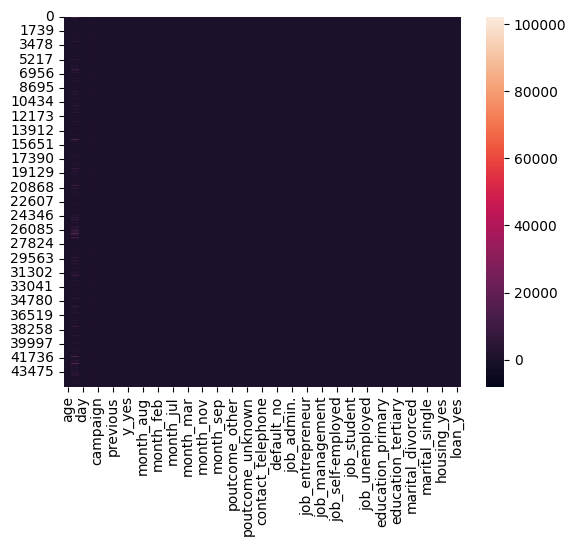

In [77]:
import seaborn as sns
sns.heatmap(data)

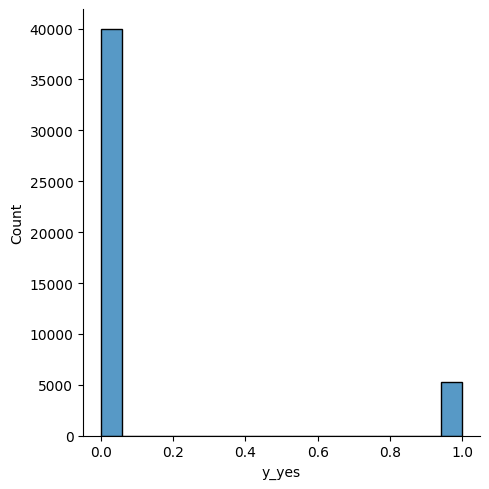

In [78]:
sns.displot(data['y_yes'])

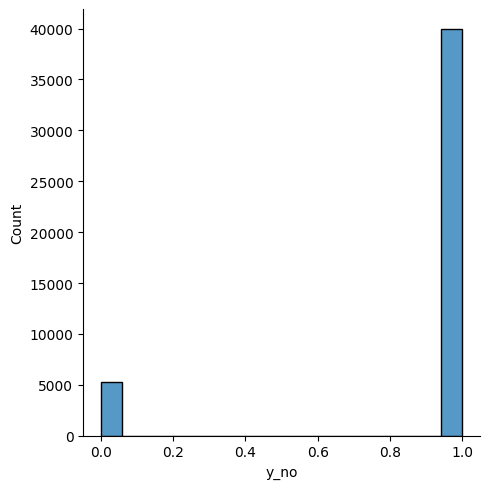

In [79]:
sns.displot(data['y_no'])

<Axes: xlabel='age', ylabel='balance'>

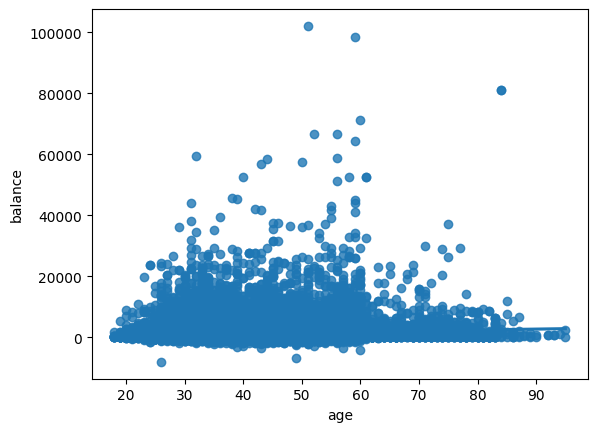

In [80]:
sns.regplot(data,x='age',y='balance')

In [81]:
data

,age,balance,day,duration,campaign,pdays,previous,y_no,y_yes,month_apr,...,education_secondary,education_tertiary,education_unknown,marital_divorced,marital_married,marital_single,housing_no,housing_yes,loan_no,loan_yes
0,58,2143,5,261,1,-1,0,1,0,0,...,0,1,0,0,1,0,0,1,1,0
1,44,29,5,151,1,-1,0,1,0,0,...,1,0,0,0,0,1,0,1,1,0
2,33,2,5,76,1,-1,0,1,0,0,...,1,0,0,0,1,0,0,1,0,1
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,1,0,1,0,0,1,1,0
4,33,1,5,198,1,-1,0,1,0,0,...,0,0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,1,0,...,0,1,0,0,1,0,1,0,1,0
45207,71,1729,17,456,2,-1,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
45208,72,5715,17,1127,5,184,3,0,1,0,...,1,0,0,0,1,0,1,0,1,0
45209,57,668,17,508,4,-1,0,1,0,0,...,1,0,0,0,1,0,1,0,1,0


In [82]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [83]:
x,y

(       age  balance  day  duration  campaign  pdays  previous  y_no  y_yes  \
 0       58     2143    5       261         1     -1         0     1      0   
 1       44       29    5       151         1     -1         0     1      0   
 2       33        2    5        76         1     -1         0     1      0   
 3       47     1506    5        92         1     -1         0     1      0   
 4       33        1    5       198         1     -1         0     1      0   
 ...    ...      ...  ...       ...       ...    ...       ...   ...    ...   
 45206   51      825   17       977         3     -1         0     0      1   
 45207   71     1729   17       456         2     -1         0     0      1   
 45208   72     5715   17      1127         5    184         3     0      1   
 45209   57      668   17       508         4     -1         0     1      0   
 45210   37     2971   17       361         2    188        11     1      0   
 
        month_apr  ...  education_primary  educati

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [88]:
scaler=MinMaxScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [89]:
data_classifier=LogisticRegression()
data_classifier.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [90]:
data_classifier.coef_

array([[ 2.04345621e-01, -4.07173727e-05,  1.20834306e-01,
         1.96327647e-03,  1.21705244e-01,  8.04570871e-04,
        -4.86262548e-03, -1.79715914e-01, -8.10617411e-01,
        -2.95908048e-01, -1.15784546e+00, -5.58521217e-02,
        -2.54726725e-01, -2.74266548e-02,  2.52085735e+00,
        -4.59349856e-01, -1.36123083e-01, -1.27381682e+00,
         4.53097906e-01, -1.38560734e-01, -1.64679072e-01,
         2.15914066e-01, -1.71353788e-02, -3.72721986e-01,
        -8.16390026e-01, -2.19453070e-01, -2.64501258e-02,
        -7.44430128e-01, -1.36789116e+00,  3.77557838e-01,
         2.19466493e-01, -8.17464290e-03,  3.23355634e-01,
        -1.07610068e-01, -7.77122577e-01,  1.73682554e-01,
        -8.77433149e-02,  2.44747309e-01, -5.54569792e-01,
        -4.65602928e-03, -3.05648651e-01, -1.06060239e-01,
        -1.19344615e-01,  7.27874348e-01, -1.15319827e+00,
        -4.45664788e-01,  3.16431349e-01,  8.84007918e-01,
        -2.19077259e+00, -9.72034347e-01, -1.82989775e-0

In [91]:
beta_coeff=pd.Series(data_classifier.coef_[0])
beta_coeff

0      0.204346
1     -0.000041
2      0.120834
3      0.001963
4      0.121705
5      0.000805
6     -0.004863
7     -0.179716
8     -0.810617
9     -0.295908
10    -1.157845
11    -0.055852
12    -0.254727
13    -0.027427
14     2.520857
15    -0.459350
16    -0.136123
17    -1.273817
18     0.453098
19    -0.138561
20    -0.164679
21     0.215914
22    -0.017135
23    -0.372722
24    -0.816390
25    -0.219453
26    -0.026450
27    -0.744430
28    -1.367891
29     0.377558
30     0.219466
31    -0.008175
32     0.323356
33    -0.107610
34    -0.777123
35     0.173683
36    -0.087743
37     0.244747
38    -0.554570
39    -0.004656
40    -0.305649
41    -0.106060
42    -0.119345
43     0.727874
44    -1.153198
45    -0.445665
46     0.316431
47     0.884008
48    -2.190773
49    -0.972034
50    -0.018299
51   -18.122912
dtype: float64

In [109]:
y_pred=data_classifier.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

In [110]:
y_pred_df=pd.DataFrame({'actual':y_test,'predicted':y_pred})
y_pred_df

,actual,predicted
6016,0,0
23977,0,0
23227,0,0
11884,0,0
10082,0,0
...,...,...
30171,0,0
15804,1,1
31492,0,0
12832,0,0


In [111]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)

In [112]:
from sklearn.metrics import confusion_matrix
confusn_matrix=confusion_matrix(y_test,y_pred)
confusn_matrix

array([[7570,    7],
       [  30, 1436]])

In [113]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7577
           1       1.00      0.98      0.99      1466

    accuracy                           1.00      9043
   macro avg       1.00      0.99      0.99      9043
weighted avg       1.00      1.00      1.00      9043



In [115]:
from sklearn.metrics import accuracy_score
accuarcy=accuracy_score(y_test,y_pred)
accuarcy

0.9959084374654429

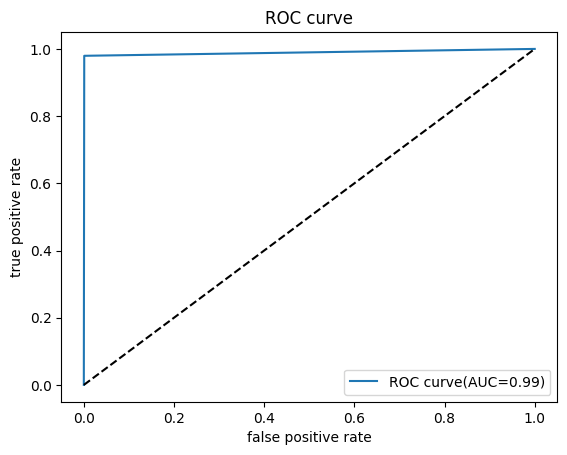

In [118]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thresholds =roc_curve(y_test,y_pred)
auc=roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,label='ROC curve(AUC=%0.2f)'% auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

#END
